A notebook for trying out and comparing different plot types to
use with covariance matrices.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

#ds_2 = xr.open_dataset("data/regions_verify_202104_cov.nc")
#bio_2 = ds_2["covariance_bio"]
#anth_2 = ds_2["covariance_anth"]




In [2]:
filepath = f'/home/pietaril/Documents/data/unc_cov_matrices/CO2_prior_cov_fin_202402.nc'
ds = xr.open_dataset(filepath)

In [3]:
K = ds.covariance

K

<xarray.DataArray 'covariance' (nparams: 13144)>
[172764736 values with dtype=float64]
Coordinates:
    lon      (nparams) float64 ...
    lat      (nparams) float64 ...
Dimensions without coordinates: nparams, nparams

Look at some stats about the values in the matrix

In [38]:
qs = np.quantile(K.values.flatten(), [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])
qs


array([0.        , 0.        , 0.        , 0.00209806, 0.03063865,
       0.14722493, 0.90168555])

In [39]:
abs(K.values).max()

1.44

(array([10605.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2539.]),
 array([0.64, 0.72, 0.8 , 0.88, 0.96, 1.04, 1.12, 1.2 , 1.28, 1.36, 1.44]),
 <BarContainer object of 10 artists>)

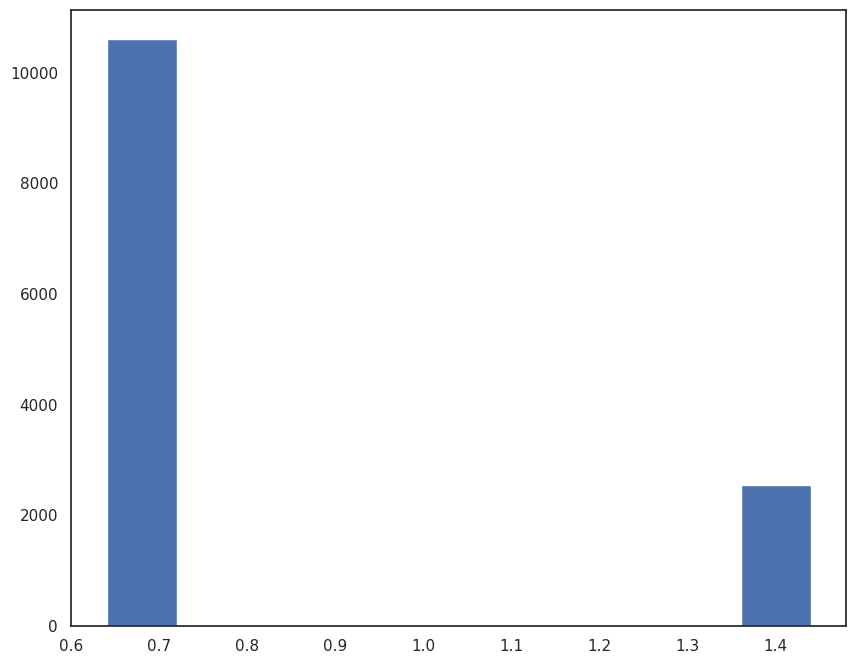

In [40]:
#variances

v = np.diag(K.values)

fig, ax = plt.subplots(figsize = (10,8))
plt.hist(v)

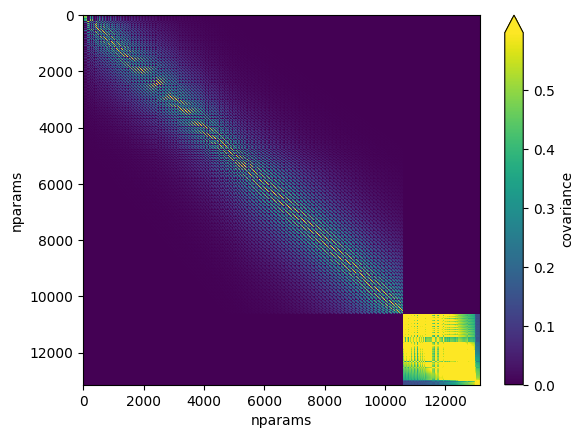

In [4]:
K.plot.imshow(origin = 'upper', robust = True)

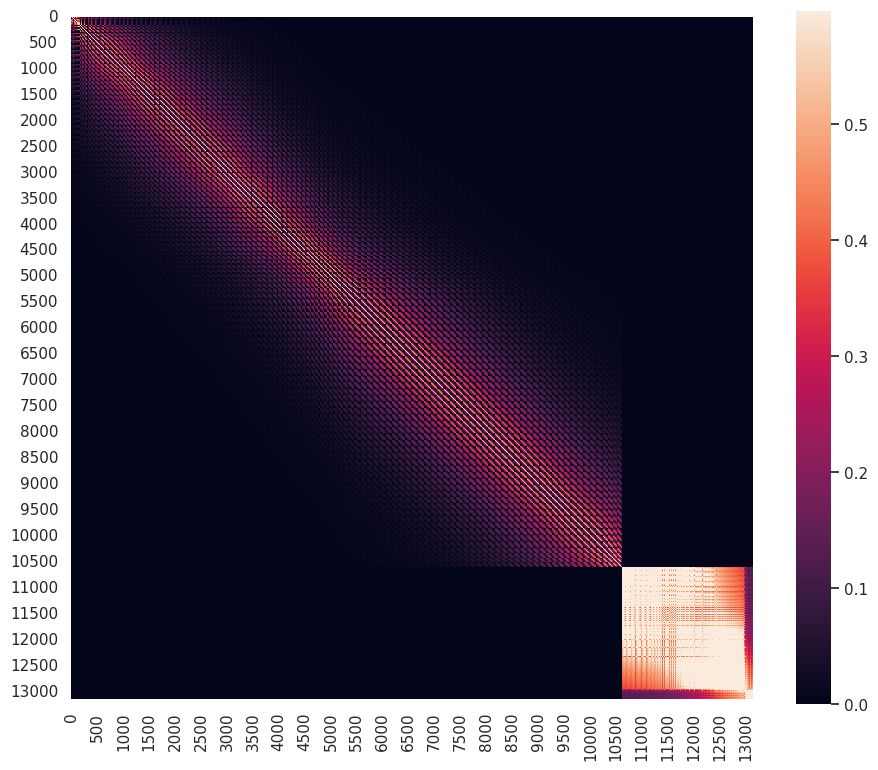

In [5]:
sns.set_theme(style="white")



f, ax = plt.subplots(figsize=(11,9))
sns.heatmap(K, xticklabels=1000, yticklabels = 1000, 
        square = True, robust = True)
plt.show()

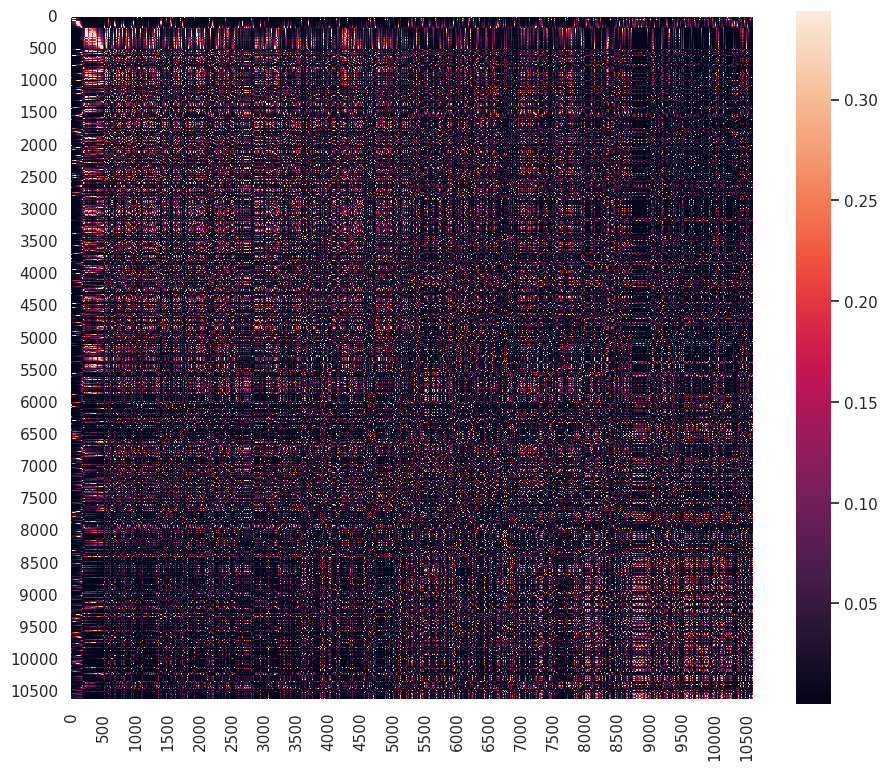

In [11]:
nland= 10605
K_land = K[0:nland, 0:nland]
K_sea = K[nland:, nland:]

sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11,9))
sns.heatmap(K_land, xticklabels=500, yticklabels = 500, 
        square = True, robust = True)
plt.show()

In [16]:
vmax = K_sea.values.max()


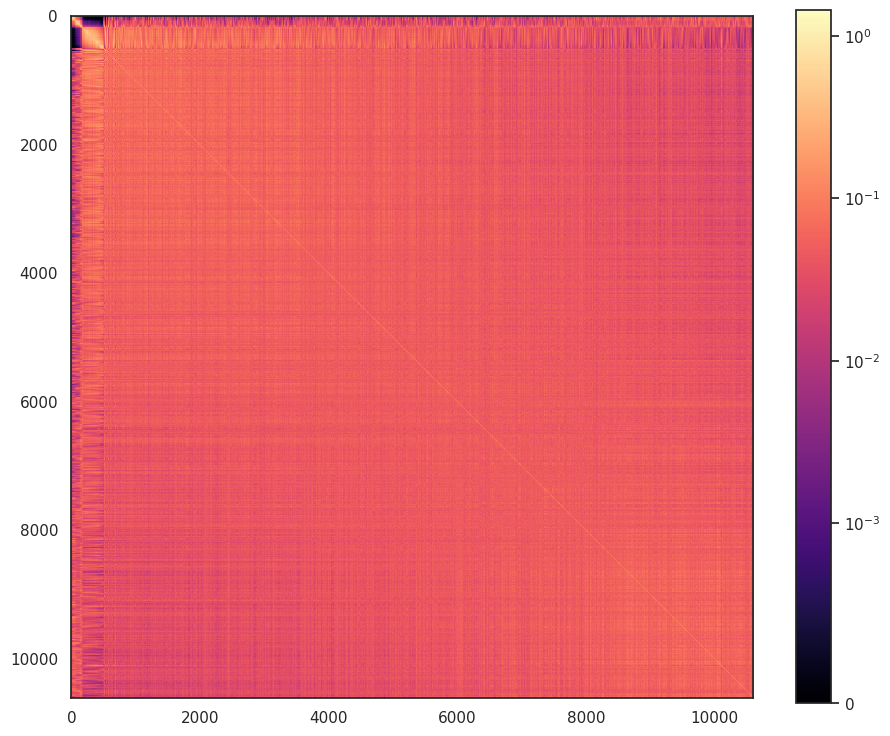

In [34]:
fig, ax = plt.subplots( figsize = (11,9))
pcm = ax.imshow(K_land, origin = 'upper', cmap = 'magma',
                  norm = colors.SymLogNorm(vmin = 0, vmax = vmax, linthresh = 1e-3))
plt.colorbar(pcm)
plt.show()

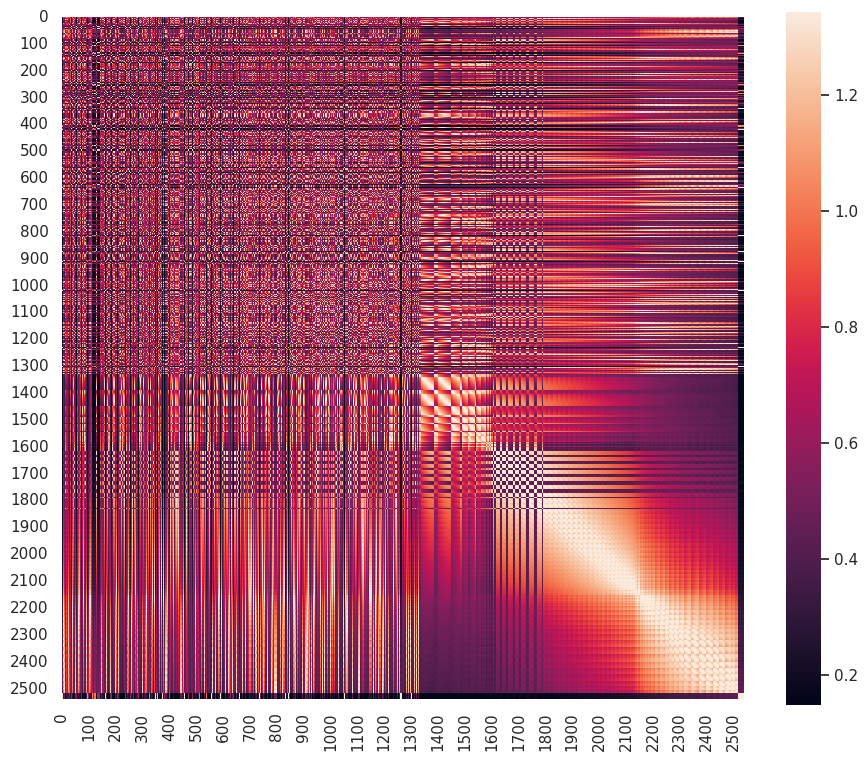

In [12]:
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11,9))
sns.heatmap(K_sea, xticklabels=100, yticklabels = 100, 
        square = True, robust = True)
plt.show()

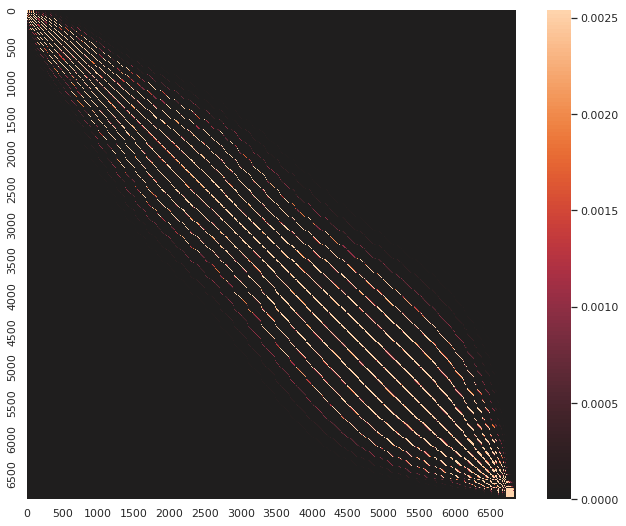

In [11]:
sns.set_theme(style="white")



f, ax = plt.subplots(figsize=(11,9))
sns.heatmap(bio_2, xticklabels=500, yticklabels = 500, center = 0, 
        square = True, robust = True)
plt.show()

AttributeError: 'AxesImage' object has no property 'robust'

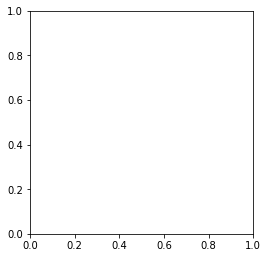

In [3]:
plt.matshow(bio_2)
plt.show()